In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set()
a4_dims = (11.7, 8.27)

In [3]:
quadros = pd.read_csv('project_data/quadros_tecnicos_pmsp.csv', sep=';')

In [4]:
quadros.sample(3)

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE,nivel_limpo,cargo_limpo
750,6463045,1,SERGIO FERREIRA DE SOUZA,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA NIVE...",QEAG16,ENGENHARIA,QEAG,SUPERIOR,SUPERIOR COMPLETO,NaN,...,EFETIVO,SUBPREFEITURA SANTANA/TUCURUVI,UNIDADE TECNICA DE LICENCIAMENTOS,NaN,M,1955,BRANCA,NAO,IV,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA"
1435,7559101,1,BRUNO SANTOS SOUZA,AUDITOR FISCAL TRIBUTARIO MUNICIPAL NII,QPAT-6,NaN,QPAT,SUPERIOR,SUPERIOR COMPLETO,NaN,...,EFETIVO,SECRETARIA MUNICIPAL DA FAZENDA,DIVISAO DO CADASTRO IMOBILIARIO,NaN,M,1984,BRANCA,NAO,II,AUDITOR FISCAL TRIBUTARIO MUNICIPAL
885,6869394,1,DANIEL JUNIOR PIRES,AUDITOR FISCAL TRIBUTARIO MUNICIPAL NII,QPAT-8,NaN,QPAT,SUPERIOR,SUPERIOR COMPLETO,NaN,...,EFETIVO,SECRETARIA MUNICIPAL DA FAZENDA,DIVISAO DE FISCALIZACAO DO SETOR DE SERVICOS 1,NaN,M,1976,BRANCA,NAO,II,AUDITOR FISCAL TRIBUTARIO MUNICIPAL


In [5]:
quadros['cargo_limpo'].unique()

array(['ANALISTA DE INFORMACOES CULTURA E DESPORTO',
       'PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA',
       'ANALISTA DE ORDENAMENTO TERRITORIAL',
       'ESP DESENVOLVIMENTO URBANO', 'SOCIOLOGO', 'ANALISTA',
       'ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL',
       'ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL',
       'ANALISTA DE MEIO AMBIENTE', 'ECONOMISTA', 'HISTORIADOR',
       'ESPECIALISTA', 'AUDITOR FISCAL TRIBUTARIO MUNICIPAL', 'CONTADOR',
       'ESP ADM ORÇAMENTO E FINANÇAS PÚBLICAS', 'ENGENHEIRO', 'ARQUITETO',
       'GEOLOGO', 'ESP ASSISTÊNCIA E DESENVOLVIMENTO SOCIAL',
       'ESP INFORM TECN CULTURAIS E DESPORTIVAS',
       'ANALISTA ASSIST DESENV SOCIAL EQUIP SOCIAL',
       'ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL',
       'AUDITOR MUNICIPAL DE CONTROLE INTERNO'], dtype=object)

In [6]:
nom_cargos = {
    'appgg' : 'ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL',
    'amci' : 'AUDITOR MUNICIPAL DE CONTROLE INTERNO'
}

In [7]:
quadros['appgg'] = quadros['cargo_limpo']==nom_cargos['appgg']
quadros['amci'] = quadros['cargo_limpo']==nom_cargos['amci']

In [8]:
quadros.groupby(['appgg', 'REF_CARGO_BAS']).count().loc[True][['REGISTRO']].rename({'REGISTRO' : 'qtd'}, axis=1)

,qtd
REF_CARGO_BAS,
APPGG1,3
APPGG2,15
APPGG3,54


In [9]:
quadros.groupby(['amci', 'REF_CARGO_BAS']).count().loc[True][['REGISTRO']].rename({'REGISTRO' : 'qtd'}, axis=1)

,qtd
REF_CARGO_BAS,
AMCI1,21
AMCI2,21
AMCI3,28


In [10]:
quadros = quadros[quadros['cargo_limpo'].isin(nom_cargos.values())].copy().reset_index(drop=True)

In [11]:
hist_remuneracao = pd.read_csv('original_data/aggregated/historico_remuneracao_jan_2017_jul_2021.csv',
                              sep=';')

In [12]:
hist_remuneracao.sample(3)

,Unnamed: 0,Exceção,Nome completo,Cargo Base,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Tp. Log,Logadrouro,Número,Complemento,Jornada,filename,Unnamed: 0.1
1801227,106312,NaN,SERVIDOR PUBLICO MUNICIPAL,GUARDA CIVIL METROPOLITANO - CLASSE ESPECIAL -...,NaN,"3.407,25","2.401,35","5.808,60",INSPETORIA 13,Rua,CAPITAO MACEDO,553,NaN,40 H,original_data/dados_portal_dados_abertos/_junh...,NaN
376967,22445,NaN,EDIVALDA MACIEL DA SILVA POSSARI,PROFESSOR ENSINO FUNDAMENTAL II E MEDIO CAT 3,NaN,"10.119,78","4.767,53","14.887,31",CEU EMEF PROFESSORA CONCEICAO APARECIDA DE JESUS,Avenida,ERNESTO SOUZA CRUZ,2171,NaN,JEI FORMACAO,original_data/dados_portal_dados_abertos/_deze...,NaN
5958565,53710,NaN,MARIA LUISA BARBOSA FERNANDES DOS SANTOS,PROFESSOR ED INFANTIL E ENS FUNDAMENTAL CAT 3,NaN,"2.901,49","815,5","3.716,99",EMEI CAMINHO DOS MARTINS,Estrada,DO PORTO DO MARTINS,32,NaN,JB DOCENTE,original_data/dados_portal_dados_abertos/_agos...,NaN


In [13]:
hist_remuneracao = hist_remuneracao[hist_remuneracao['Cargo Base'].isin(quadros['CARGO_BASICO'].unique())].copy()

In [14]:
def remover_acentos(nome):
    
    relacao =  {
        'Ã' : 'A',
        'Á' : 'A',
        'Â' : 'A',
        'Õ' : 'O',
        'Ó' : 'O',
        'Ô' : 'O',
        'É' : 'E',
        'Ê' : 'E',
        'Í' : 'I',
        'Ú': 'U',
        'Ç' : 'C'
    }
    
    chars = []
    for char in nome:
        if char in relacao:
            char = relacao[char]
        chars.append(char)
    
    return ''.join(chars)

In [15]:
hist_remuneracao['Nome completo'] = hist_remuneracao['Nome completo'].apply(remover_acentos)

In [16]:
quadros['NOME'] = quadros['NOME'].apply(remover_acentos)

In [17]:
possivelmente_sairam = set(hist_remuneracao['Nome completo'].unique()) - set(quadros['NOME'].unique())

In [18]:
possivelmente_sairam

{'ANELISA ZERLIM',
 'AZIZIANE DIAS OLIVEIRA TODAKA',
 'CARLOS EDUARDO MARTINS GRANGEIRO DA SILVA',
 'CATHERINE KAORI MAKIYAMA',
 'DAMARIS DI DONATTO FERREIRA',
 'DIONNI ALBERTH DE MOURA',
 'FABIO KENDY NISHINO',
 'FERNANDA CAMPAGNUCCI PEREIRA',
 'FERNANDO HIDEKI  ISHIDA OSHIMA',
 'FERNANDO HIDEKI ISHIDA OSHIMA',
 'GUSTAVO GESTEIRA PONTUAL SAMPAIO',
 'JOAO PAULO POSSA TERRA',
 'LUIZ GIVAGO FRANCO DUTRA',
 'MARCELA FERNANDES LASSI DE OLIVEIRA',
 'MARCIA MARIA BOTTEON RODRIGUES',
 'SERVIDOR PUBLICO MUNICIPAL',
 'SILAS CARDOSO DE SOUZA'}

In [19]:
for nome in possivelmente_sairam:
    primeiro_nome = nome.split(' ')[0]
    
    achou = quadros[quadros['NOME'].str.contains(primeiro_nome)]['NOME'].unique()
    
    if len(achou)>0:
        print(nome)
        print(achou)

FABIO KENDY NISHINO
['FABIO MARIANO ESPINDOLA DA SILVA' 'FABIO FERNANDES LIBONATI']
MARCELA FERNANDES LASSI DE OLIVEIRA
['MARCELA FERNANDES LASSI DE OLIVEIRA LOURENCO']
CARLOS EDUARDO MARTINS GRANGEIRO DA SILVA
['LUIZ CARLOS LOPES' 'CARLOS EDUARDO DE OLIVEIRA']
DAMARIS DI DONATTO FERREIRA
['DAMARIS DI DONATTO FERREIRA TORQUATO']
ANELISA ZERLIM
['ANELISA ZERLIN']
FERNANDA CAMPAGNUCCI PEREIRA
['FERNANDA BRAZ TOBIAS DE AGUIAR' 'CRISTIANE FERNANDA AGUEMI'
 'HELEN FERNANDA BIAZON' 'FERNANDA NEVES MAGALDI']
JOAO PAULO POSSA TERRA
['JOAO PAULO DE BRITO GRECO' 'CELIA MARIA DE NOVAIS JOAO']
LUIZ GIVAGO FRANCO DUTRA
['LUIZ CARLOS LOPES' 'THIAGO LUIZ ROSASCO ERMEL'
 'WAGNER LUIZ TAQUES DA ROCHA']
GUSTAVO GESTEIRA PONTUAL SAMPAIO
['GUSTAVO GUIMARAES DE CAMPOS RABELLO']


In [20]:
def arrumar_nome(nome):
    
    de_para = {
        'MARCELA FERNANDES LASSI DE OLIVEIRA' : 'MARCELA FERNANDES LASSI DE OLIVEIRA LOURENCO',
        'ANELISA ZERLIM' : 'ANELISA ZERLIN',
        'DAMARIS DI DONATTO FERREIRA' : 'DAMARIS DI DONATTO FERREIRA TORQUATO',
        'JOAO PAULO POSSA TERRA' : 'TERRA JOHARI POSSA TERRA'
    }
    
    if nome in de_para:
        nome = de_para[nome]
        
    return nome

In [21]:
hist_remuneracao['Nome completo'] = hist_remuneracao['Nome completo'].apply(arrumar_nome)

In [22]:
possivelmente_sairam = set(hist_remuneracao['Nome completo'].unique()) - set(quadros['NOME'].unique())

In [23]:
possivelmente_sairam

{'AZIZIANE DIAS OLIVEIRA TODAKA',
 'CARLOS EDUARDO MARTINS GRANGEIRO DA SILVA',
 'CATHERINE KAORI MAKIYAMA',
 'DIONNI ALBERTH DE MOURA',
 'FABIO KENDY NISHINO',
 'FERNANDA CAMPAGNUCCI PEREIRA',
 'FERNANDO HIDEKI  ISHIDA OSHIMA',
 'FERNANDO HIDEKI ISHIDA OSHIMA',
 'GUSTAVO GESTEIRA PONTUAL SAMPAIO',
 'LUIZ GIVAGO FRANCO DUTRA',
 'MARCIA MARIA BOTTEON RODRIGUES',
 'SERVIDOR PUBLICO MUNICIPAL',
 'SILAS CARDOSO DE SOUZA'}

In [24]:
hist_appgg_amci = pd.merge(hist_remuneracao, quadros, right_on = 'NOME', left_on = 'Nome completo', how='left')

In [25]:
len(hist_appgg_amci) == len(hist_remuneracao)

True

In [26]:
del hist_remuneracao

In [27]:
hist_appgg_amci.sample()

,Unnamed: 0,Exceção,Nome completo,Cargo Base,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Tp. Log,...,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE,nivel_limpo,cargo_limpo,appgg,amci
1785,112906,NaN,ALESSANDRO LUIS VENANCIO,AUDITOR MUNICIPAL DE CONTROLE INTERNO - NIVEL I,NaN,"13.904,17","2.729,59","16.633,76",CORREGEDORIA GERAL DO MUNICIPIO,Rua,...,CORREGEDORIA GERAL DO MUNICIPIO,NaN,M,1977.0,BRANCA,NAO,I,AUDITOR MUNICIPAL DE CONTROLE INTERNO,False,True


In [28]:
#remuneracoes que nao pegou
hist_appgg_amci['REGISTRO'].isnull().sum()

381

In [29]:
nome_nao_pegou = hist_appgg_amci[hist_appgg_amci['REGISTRO'].isnull()]['Nome completo'].unique()

In [30]:
nome_nao_pegou

array(['FERNANDA CAMPAGNUCCI PEREIRA',
       'CARLOS EDUARDO MARTINS GRANGEIRO DA SILVA', 'FABIO KENDY NISHINO',
       'GUSTAVO GESTEIRA PONTUAL SAMPAIO', 'SERVIDOR PUBLICO MUNICIPAL',
       'FERNANDO HIDEKI ISHIDA OSHIMA', 'MARCIA MARIA BOTTEON RODRIGUES',
       'CATHERINE KAORI MAKIYAMA', 'DIONNI ALBERTH DE MOURA',
       'LUIZ GIVAGO FRANCO DUTRA', 'FERNANDO HIDEKI  ISHIDA OSHIMA',
       'SILAS CARDOSO DE SOUZA', 'AZIZIANE DIAS OLIVEIRA TODAKA'],
      dtype=object)

In [31]:
set(nome_nao_pegou) - set(possivelmente_sairam)

set()

In [32]:
set(possivelmente_sairam) - set(nome_nao_pegou)

set()

In [33]:
hist_appgg_amci = hist_appgg_amci[hist_appgg_amci['REGISTRO'].notnull()].copy().reset_index()

In [34]:
hist_appgg_amci.keys()

Index(['index', 'Unnamed: 0', 'Exceção', 'Nome completo', 'Cargo Base',
       'Cargo em Comissão', 'Remuneração do Mês',
       'Demais Elementos da Remuneração', 'Remuneração Bruta', 'Unidade',
       'Tp. Log', 'Logadrouro', 'Número', 'Complemento', 'Jornada', 'filename',
       'Unnamed: 0.1', 'REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO',
       'REF_CARGO_BAS', 'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO',
       'CARGO_COMISSAO', 'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO',
       'DATA_INICIO_EXERC', 'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR',
       'ORGAO_EXT', 'SEXO', 'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE',
       'nivel_limpo', 'cargo_limpo', 'appgg', 'amci'],
      dtype='object')

In [35]:
dropar = [
    'index', 
    'Unnamed: 0',
    'Nome completo',
    'Unnamed: 0.1',
]

In [36]:
hist_appgg_amci.drop(dropar, axis=1, inplace=True)

In [37]:
hist_appgg_amci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Exceção                          0 non-null      float64
 1   Cargo Base                       6812 non-null   object 
 2   Cargo em Comissão                902 non-null    object 
 3   Remuneração do Mês               6812 non-null   object 
 4   Demais Elementos da Remuneração  6812 non-null   object 
 5   Remuneração Bruta                6812 non-null   object 
 6   Unidade                          6812 non-null   object 
 7   Tp. Log                          6458 non-null   object 
 8   Logadrouro                       6584 non-null   object 
 9   Número                           6812 non-null   object 
 10  Complemento                      5647 non-null   object 
 11  Jornada                          6812 non-null   object 
 12  filename            

In [38]:
(hist_appgg_amci['Cargo Base']!=hist_appgg_amci['CARGO_BASICO']).sum()

0

In [39]:
hist_appgg_amci.drop('Cargo Base', axis=1, inplace=True)

In [40]:
hist_appgg_amci.keys()

Index(['Exceção', 'Cargo em Comissão', 'Remuneração do Mês',
       'Demais Elementos da Remuneração', 'Remuneração Bruta', 'Unidade',
       'Tp. Log', 'Logadrouro', 'Número', 'Complemento', 'Jornada', 'filename',
       'REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE', 'nivel_limpo', 'cargo_limpo',
       'appgg', 'amci'],
      dtype='object')

In [41]:
hist_appgg_amci['filename'].unique()[:3]

array(['original_data/dados_portal_dados_abertos/_fevereiro_de_2019.csv',
       'original_data/dados_portal_dados_abertos/_dezembro_de_2020.csv',
       'original_data/dados_portal_dados_abertos/_dezembro_de_2019.csv'],
      dtype=object)

In [42]:
'original_data/dados_portal_dados_abertos/_fevereiro_de_2019.csv'.split('/')[-1]

'_fevereiro_de_2019.csv'

In [43]:
'_fevereiro_de_2019.csv'.split('_')[1]

'fevereiro'

In [44]:
'_fevereiro_de_2019.csv'.split('_')[-1]

'2019.csv'

In [45]:
def pegar_mes_remuneracao(filename):
    
    splited = filename.split('/')[-1]
    
    mes = splited.split('_')[1]
    
    mes_to_num = {
        'janeiro' : '01',
        'fevereiro' : '02',
        'março' : '03',
        'abril' : '04',
        'maio' : '05',
        'junho' : '06',
        'julho' : '07',
        'agosto' : '08',
        'setembro' : '09',
        'outubro': '10',
        'novembro' : '11',
        'dezembro' : '12'
    }
    
    return mes_to_num[mes]

In [46]:
def pegar_ano_remuneracao(filename):
    
    splited = filename.split('/')[-1]
    
    ano = splited.split('_')[-1]
    ano = ano.replace('.csv', '')
    ano = ano.replace('.', '') #algum tá com dois pontos
    return ano

In [47]:
hist_appgg_amci['mes_remuneracao'] = hist_appgg_amci['filename'].apply(pegar_mes_remuneracao)
hist_appgg_amci['ano_remuneracao'] = hist_appgg_amci['filename'].apply(pegar_ano_remuneracao)
hist_appgg_amci['dtime_remuneracao'] = hist_appgg_amci['mes_remuneracao']+'/'+hist_appgg_amci['ano_remuneracao']


In [48]:
hist_appgg_amci['dtime_remuneracao'].unique()

array(['02/2019', '12/2020', '12/2019', '12/2018', '01/2018', '11/2020',
       '05/2021', '04/2017', '03/2021', '03/2018', '09/2019', '04/2019',
       '05/2018', '07/2021', '06/2020', '03/2019', '03/2020', '01/2019',
       '04/2021', '02/2020', '10/2020', '11/2019', '03/2017', '07/2020',
       '11/2017', '08/2020', '07/2018', '05/2020', '01/2020', '10/2018',
       '09/2020', '09/2018', '06/2017', '08/2017', '06/2019', '09/2017',
       '05/2019', '12/2017', '05/2017', '07/2017', '10/2017', '02/2017',
       '11/2018', '10/2019', '07/2019', '06/2018', '02/2021', '01/2017',
       '06/2021', '08/2019', '08/2018', '04/2018', '01/2021', '04/2020',
       '02/2018'], dtype=object)

In [49]:
hist_appgg_amci['dtime_remuneracao'] = pd.to_datetime(hist_appgg_amci['dtime_remuneracao'], format = '%m/%Y')

In [50]:
hist_appgg_amci.sort_values(by = 'dtime_remuneracao', inplace=True)

In [51]:
hist_appgg_amci.keys()

Index(['Exceção', 'Cargo em Comissão', 'Remuneração do Mês',
       'Demais Elementos da Remuneração', 'Remuneração Bruta', 'Unidade',
       'Tp. Log', 'Logadrouro', 'Número', 'Complemento', 'Jornada', 'filename',
       'REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE', 'nivel_limpo', 'cargo_limpo',
       'appgg', 'amci', 'mes_remuneracao', 'ano_remuneracao',
       'dtime_remuneracao'],
      dtype='object')

In [52]:
hist_appgg_amci.to_csv('project_data/historico_remuneracao_appgg_amci_raw.csv', sep = ';')

In [53]:
cols_remuneracao = ['Remuneração do Mês',
                   'Demais Elementos da Remuneração',
                    'Remuneração Bruta']

In [54]:
hist_appgg_amci[cols_remuneracao].sample(3)

,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta
706,"14.738,41","372,97","15.111,38"
2451,"10.083,00","333,71","10.416,71"
4587,"9.000,00","412,28","9.412,28"


In [55]:
hist_appgg_amci[cols_remuneracao].dtypes

Remuneração do Mês                 object
Demais Elementos da Remuneração    object
Remuneração Bruta                  object
dtype: object

In [56]:
def remuneracao_float(item):
    
    if pd.isnull(item):
        return item
    if item == '':
        return np.NaN
    else:
        item = item.replace('.', '')
        item = item.replace('R$', '')
        item = item.replace(' ', '')
        item = item.replace(',', '.')
        if item:
            return round(float(item), 2)
        else:
            #tem uns valores que sao soh espaço em branco
            return np.NaN


In [57]:
for col in cols_remuneracao:
    hist_appgg_amci[col] = hist_appgg_amci[col].apply(remuneracao_float)

<AxesSubplot:title={'center':'Histograma remuneracao Quadro'}, ylabel='Frequency'>

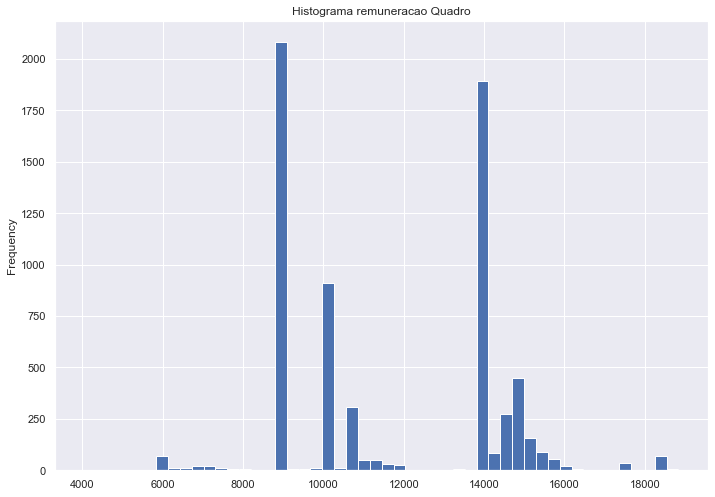

In [58]:
fig, ax = plt.subplots(figsize=a4_dims)
hist_appgg_amci['Remuneração do Mês'].plot.hist(bins=50, title='Histograma remuneracao Quadro')

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Remuneração do Mês'>

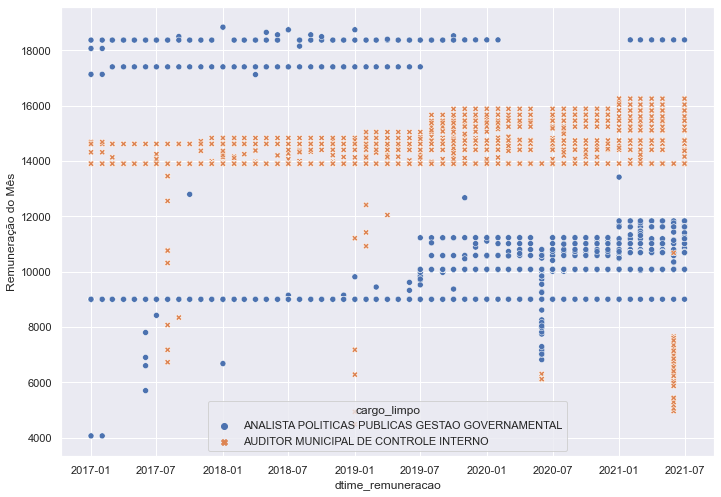

In [59]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='dtime_remuneracao', y='Remuneração do Mês',
               data=hist_appgg_amci, hue = 'cargo_limpo', style="cargo_limpo")

In [60]:
hist_appgg_amci[hist_appgg_amci['Remuneração do Mês']>18000]

,Exceção,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Tp. Log,Logadrouro,Número,Complemento,...,ANO_NASCIMENTO,RACA,DEFICIENTE,nivel_limpo,cargo_limpo,appgg,amci,mes_remuneracao,ano_remuneracao,dtime_remuneracao
5855,NaN,SECRETARIO-ADJUNTO,18065.71,352.38,18418.09,GABINETE DO SECRETARIO,R,BORGES LAGOA,1230,NaN,...,1976.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01
5898,NaN,SECRETARIO-ADJUNTO,18367.90,352.38,18720.28,GABINETE DO SECRETARIO,R,LIBERO BADARÓ,425,34º ANDAR,...,1981.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01
5166,NaN,SECRETARIO-ADJUNTO,18367.90,352.38,18720.28,GABINETE DO SECRETARIO,R,LIBERO BADARÓ,425,34º ANDAR,...,1981.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,02,2017,2017-02-01
5123,NaN,SECRETARIO-ADJUNTO,18065.71,352.38,18418.09,GABINETE DO SECRETARIO,R,BORGES LAGOA,1230,NaN,...,1976.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,02,2017,2017-02-01
2872,NaN,SECRETARIO-ADJUNTO,18367.90,385.94,18753.84,GABINETE DO SECRETARIO,R,BORGES LAGOA,1230,NaN,...,1976.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,03,2017,2017-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,NaN,SECRETARIO EXECUTIVO ADJUNTO,18375.22,372.97,18748.19,GABINETE DO PREFEITO,Viaduto,DO CHA,15,5º ANDAR,...,1984.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,03,2021,2021-03-01
2329,NaN,SECRETARIO EXECUTIVO ADJUNTO,18375.22,372.97,18748.19,GABINETE DO PREFEITO,Viaduto,DO CHA,15,5º ANDAR,...,1984.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,04,2021,2021-04-01
796,NaN,SECRETARIO EXECUTIVO ADJUNTO,18375.22,412.23,18787.45,GABINETE DO PREFEITO,Viaduto,DO CHA,15,5º ANDAR,...,1984.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,05,2021,2021-05-01
5932,NaN,SECRETARIO EXECUTIVO ADJUNTO,18375.22,431.86,18807.08,GABINETE DO PREFEITO,Viaduto,DO CHA,15,5º ANDAR,...,1984.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,06,2021,2021-06-01


In [61]:
hist_appgg_amci['Cargo em Comissão'].unique()

array([nan, 'SECRETARIO-ADJUNTO', 'ASSESSOR TECNICO II',
       'CHEFE DE GABINETE', 'DIRETOR DE DIVISAO TECNICA',
       'CHEFE DE ASSESSORIA TECNICA', 'COORDENADOR',
       'CHEFE DE ASSESSORIA TECNICA II', 'ASSESSOR TECNICO I',
       'COORDENADOR V', 'ASSESSOR II', 'DIRETOR DE DEPARTAMENTO TECNICO',
       'SUPERVISOR TECNICO II', 'ASSESSOR ESPECIAL I', 'SUPERVISOR GERAL',
       'SECRETARIO EXECUTIVO ADJUNTO', 'SUBSECRETARIO',
       'ASSESSOR ESPECIAL II'], dtype=object)

In [62]:
cargos_opta_salario = [
    'SECRETARIO-ADJUNTO',
    'CHEFE DE GABINETE',
    'SECRETARIO EXECUTIVO ADJUNTO', 
    'SUBSECRETARIO',
]

In [63]:
hist_appgg_amci = hist_appgg_amci[~
                                  hist_appgg_amci['Cargo em Comissão'].isin(cargos_opta_salario)
                                 ].copy().reset_index(drop=True)

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Remuneração do Mês'>

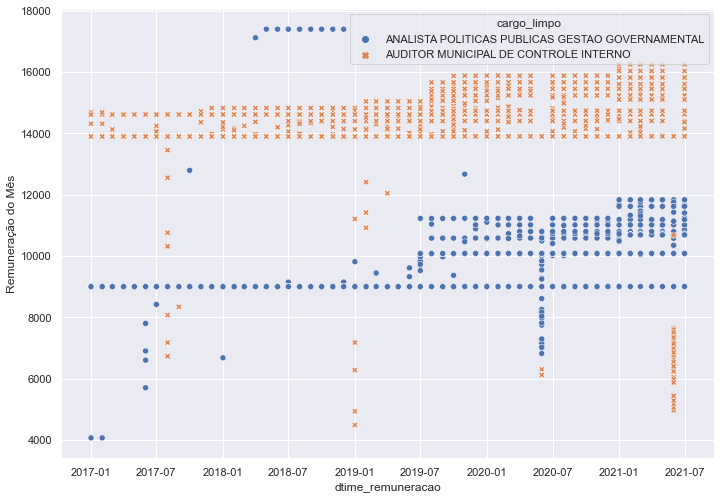

In [64]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x='dtime_remuneracao', y='Remuneração do Mês',
               data=hist_appgg_amci, hue = 'cargo_limpo', style="cargo_limpo")

In [65]:
# O DANIEL ERA CHEFE DE GABINETE NESSA EPOCA, TEM INCONSISTENCIA NA BASE
maior_17_mil = hist_appgg_amci[hist_appgg_amci['Remuneração do Mês']>17000][['Cargo em Comissão', 'NOME', 'Unidade', 'dtime_remuneracao']]

In [66]:
maior_17_mil

,Cargo em Comissão,NOME,Unidade,dtime_remuneracao
1618,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE TRABALHO E EMPREENDEDO...,2018-04-01
1640,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE TRABALHO E EMPREENDEDO...,2018-05-01
1817,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE TRABALHO E EMPREENDEDO...,2018-06-01
1951,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE TRABALHO E EMPREENDEDO...,2018-07-01
2020,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE TRABALHO E EMPREENDEDO...,2018-08-01
2108,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO,2018-09-01
2322,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO,2018-10-01
2338,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO,2018-11-01
2474,NaN,DANIEL BRUNO GARCIA,SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO,2018-12-01


In [67]:
hist_appgg_amci.drop(maior_17_mil.index, inplace=True)

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Remuneração do Mês'>

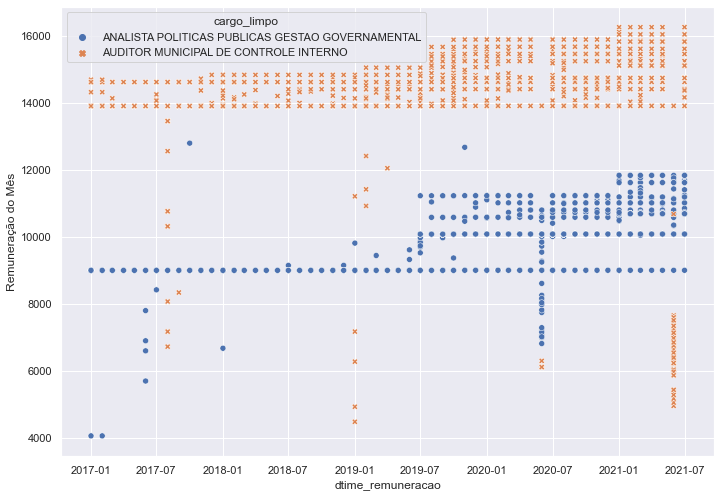

In [68]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x='dtime_remuneracao', y='Remuneração do Mês',
               data=hist_appgg_amci, hue = 'cargo_limpo', style="cargo_limpo")

In [69]:
medias_salarios = hist_appgg_amci.groupby(['dtime_remuneracao', 'cargo_limpo'])[['Remuneração do Mês']].mean()

In [70]:
medias_salarios = medias_salarios.reset_index()

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Remuneração do Mês'>

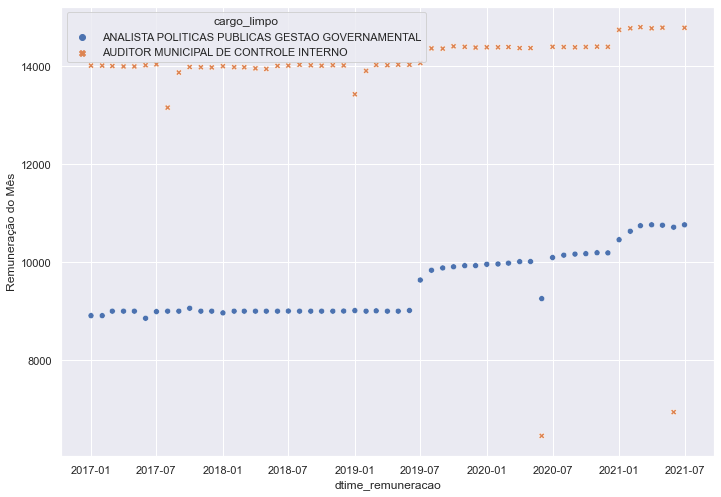

In [71]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x='dtime_remuneracao', y='Remuneração do Mês',
               data=medias_salarios, hue = 'cargo_limpo', style="cargo_limpo")

In [72]:
medias_salarios_brutos = hist_appgg_amci.groupby(['dtime_remuneracao', 'cargo_limpo'])[['Remuneração Bruta']].mean()

In [73]:
medias_salarios_brutos = medias_salarios_brutos.reset_index()

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Remuneração Bruta'>

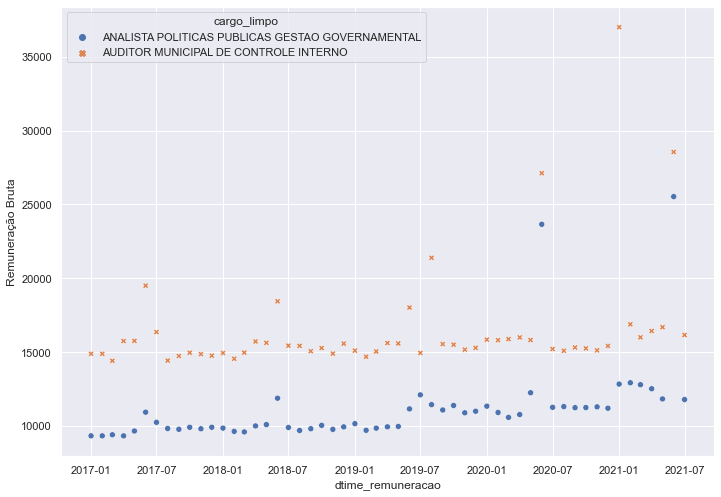

In [74]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x='dtime_remuneracao', y='Remuneração Bruta',
               data=medias_salarios_brutos, hue = 'cargo_limpo', style="cargo_limpo")

In [75]:
medias_salarios_brutos[medias_salarios_brutos['Remuneração Bruta']>30000]

,dtime_remuneracao,cargo_limpo,Remuneração Bruta
97,2021-01-01,AUDITOR MUNICIPAL DE CONTROLE INTERNO,36996.884429


In [76]:
mais_que_30_mil = hist_appgg_amci[hist_appgg_amci['Remuneração Bruta']>30000]

In [77]:
mais_que_30_mil['cargo_limpo'].unique()

array(['AUDITOR MUNICIPAL DE CONTROLE INTERNO',
       'ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL'], dtype=object)

In [78]:
mais_que_30_mil.keys()

Index(['Exceção', 'Cargo em Comissão', 'Remuneração do Mês',
       'Demais Elementos da Remuneração', 'Remuneração Bruta', 'Unidade',
       'Tp. Log', 'Logadrouro', 'Número', 'Complemento', 'Jornada', 'filename',
       'REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE', 'nivel_limpo', 'cargo_limpo',
       'appgg', 'amci', 'mes_remuneracao', 'ano_remuneracao',
       'dtime_remuneracao'],
      dtype='object')

In [79]:
mais_que_30_mil[mais_que_30_mil['NOME']=='HENRIQUE POUGY']

,Exceção,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Tp. Log,Logadrouro,Número,Complemento,...,ANO_NASCIMENTO,RACA,DEFICIENTE,nivel_limpo,cargo_limpo,appgg,amci,mes_remuneracao,ano_remuneracao,dtime_remuneracao
4938,NaN,ASSESSOR TECNICO II,10798.97,19836.65,30635.62,SECRETARIA MUNICIPAL DE LICENCIAMENTO,Rua,SAO BENTO,405,18º ANDAR,...,1990.0,BRANCA,NAO,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,06,2020,2020-06-01


In [80]:
import requests
from bs4 import BeautifulSoup

In [81]:
def post_inflacao(mes_inicial, mes_final, valor):
    
    valor = str(round(valor, 2)).replace('.', ',')
    if not valor.endswith('.0'):
        valor = valor + '0'
    
    data = {
        'aba' : '1',
        'selIndice' : '00433IPCA',
        'dataInicial' : mes_inicial,
        'dataFinal' : mes_final,
        'valorCorrecao' : valor,
        'idIndice' : "",
        'nomeIndicePeriodo' : ''
    }
    
    url = 'https://www3.bcb.gov.br/CALCIDADAO/publico/corrigirPorIndice.do?method=corrigirPorIndice'
    with requests.post(url, data=data) as r:
        return r.text
    
def corrigir_inflacao(mes_inicial, mes_final, valor):
    
    if pd.isnull(valor):
        return np.NaN
    
    html = post_inflacao(mes_inicial, mes_final, valor)
    sopa = BeautifulSoup(html)
    valor_raw = sopa.find_all('td', {'class' : 'fundoPadraoAClaro3'})[-1]

    valor_str = valor_raw.text.strip().replace('R$', '')\
        .replace('\xa0', '').replace('( REAL )', '').strip()

    valor_float = float(valor_str.replace('.', '').replace(',', '.'))

    return valor_float
    

In [82]:
corrigir_inflacao('01/2016', '07/2020', 9000)

107054.92

In [83]:
hist_appgg_amci['mes_ano_remuneracao'] = hist_appgg_amci['mes_remuneracao'] + '/' + hist_appgg_amci['ano_remuneracao']

In [84]:
hist_appgg_amci = hist_appgg_amci.copy().reset_index(drop=True)

In [85]:
import json

In [86]:
with open('cache_correcao_ipca.json', 'r') as f:
    cache = json.load(f)

In [90]:
hist_appgg_amci['remuneracao_base_corrigida'] = 0

for i, row in hist_appgg_amci.iterrows():
    
    mes = row['mes_ano_remuneracao']
    if mes not in cache:
        cache[mes] = {}
    mes_atual = '07/2021'
    valor = round(row['Remuneração do Mês'], 2)
        
    cached = cache[mes].get(valor)
    if i%100==0:
        print(i)
    if cached:
        hist_appgg_amci.loc[i, 'remuneracao_base_corrigida'] = cached
    else:
        try:
            print(f'buscando {valor}')
            corrigido = corrigir_inflacao(mes, mes_atual, valor)
            cache[mes][valor] = corrigido
            hist_appgg_amci.loc[i, 'remuneracao_base_corrigida'] = corrigido
        except Exception as e:
            print(mes)
            print(valor)
            raise e

0
buscando 9000.0
buscando 13900.0
buscando 4064.52
buscando 14685.03
buscando 14615.76
buscando 14315.6
buscando 9000.0
buscando 13900.0
buscando 14315.6
buscando 14615.76
100
buscando 14685.03
buscando 4064.52
buscando 9000.0
buscando 13900.0
200
buscando 14615.76
buscando 14130.89
buscando 9000.0
buscando 13900.0
300
buscando 14615.76
buscando 9000.0
buscando 13900.0
buscando 14615.76
400
buscando 9000.0
buscando 13900.0
buscando nan
buscando 14615.76
buscando 5700.0
buscando 6600.0
buscando nan
buscando 6900.0
buscando 7800.0
500
buscando 9000.0
buscando 8419.35
buscando 13900.0
buscando 14615.76
buscando 14246.34
buscando 14084.71
buscando 14061.62
600
buscando 9000.0
buscando 13451.61
buscando 10312.9
buscando 13900.0
buscando 14615.76
buscando 10761.29
buscando 8070.97
buscando 7174.19
buscando 6725.81
700
buscando 12554.84
buscando 13900.0
buscando 8340.0
buscando 14615.76
buscando 9000.0
800
buscando 13900.0
buscando 14615.76
buscando 9000.0
buscando nan
900
buscando 12794.07


In [91]:
with open('cache_correcao_ipca.json', 'w') as f:
    json.dump(cache, f)

In [92]:
try:
    with open('cache_correcao_proprio_mes_ipca.json', 'r') as f:
        cache_mes = json.load(f)
except:
    cache_mes = {}

In [93]:
hist_appgg_amci['remuneracao_base_corrigida_mes'] = 0

for i, row in hist_appgg_amci.iterrows():
    
    mes = row['mes_ano_remuneracao']
    if mes not in cache_mes:
        cache_mes[mes] = {}
    mes_atual = mes
    valor = round(row['Remuneração do Mês'], 2)
        
    cached = cache_mes[mes].get(valor)
    if i%100==0:
        print(i)
    if cached:
        hist_appgg_amci.loc[i, 'remuneracao_base_corrigida_mes'] = cached
    else:
        try:
            print(f'buscando {valor}')
            corrigido = corrigir_inflacao(mes, mes_atual, valor)
            cache_mes[mes][valor] = corrigido
            hist_appgg_amci.loc[i, 'remuneracao_base_corrigida_mes'] = corrigido
        except Exception as e:
            print(mes)
            print(valor)
            raise e

0
buscando 9000.0
buscando 13900.0
buscando 4064.52
buscando 14685.03
buscando 14615.76
buscando 14315.6
buscando 9000.0
buscando 13900.0
buscando 14315.6
buscando 14615.76
100
buscando 14685.03
buscando 4064.52
buscando 9000.0
buscando 13900.0
200
buscando 14615.76
buscando 14130.89
buscando 9000.0
buscando 13900.0
300
buscando 14615.76
buscando 9000.0
buscando 13900.0
buscando 14615.76
400
buscando 9000.0
buscando 13900.0
buscando nan
buscando 14615.76
buscando 5700.0
buscando 6600.0
buscando nan
buscando 6900.0
buscando 7800.0
500
buscando 9000.0
buscando 8419.35
buscando 13900.0
buscando 14615.76
buscando 14246.34
buscando 14084.71
buscando 14061.62
600
buscando 9000.0
buscando 13451.61
buscando 10312.9
buscando 13900.0
buscando 14615.76
buscando 10761.29
buscando 8070.97
buscando 7174.19
buscando 6725.81
700
buscando 12554.84
buscando 13900.0
buscando 8340.0
buscando 14615.76
buscando 9000.0
800
buscando 13900.0
buscando 14615.76
buscando 9000.0
buscando nan
900
buscando 12794.07


In [94]:
with open('cache_correcao_ipca.json', 'w') as f:
    json.dump(cache, f)

In [95]:
hist_appgg_amci.to_csv('project_data/historico_remuneracao_appgg_amci_correcao_ipca.csv')

In [96]:
hist_appgg_amci

,Exceção,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Tp. Log,Logadrouro,Número,Complemento,...,nivel_limpo,cargo_limpo,appgg,amci,mes_remuneracao,ano_remuneracao,dtime_remuneracao,mes_ano_remuneracao,remuneracao_base_corrigida,remuneracao_base_corrigida_mes
0,NaN,NaN,9000.00,352.38,9352.38,GABINETE DO PREFEITO,Viaduto,DO CHÁ,15,5º ANDAR,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01,01/2017,10978.10,9034.20
1,NaN,NaN,9000.00,352.38,9352.38,SECRETARIA MUNICIPAL DE HABITACAO,NaN,RUA SAO BENTO,405,22 AND SL 223,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01,01/2017,10978.10,9034.20
2,NaN,NaN,9000.00,352.38,9352.38,SECRETARIA MUNICIPAL DE HABITACAO,NaN,RUA SAO BENTO,405,22 AND SL 223,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01,01/2017,10978.10,9034.20
3,NaN,NaN,9000.00,352.38,9352.38,SECRETARIA MUNICIPAL DE EDUCACAO,R,BORGES LAGOA,1230,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01,01/2017,10978.10,9034.20
4,NaN,NaN,9000.00,352.38,9352.38,SECRETARIA MUNICIPAL DE EDUCACAO,R,BORGES LAGOA,1230,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,01,2017,2017-01-01,01/2017,10978.10,9034.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,NaN,ASSESSOR ESPECIAL I,11618.74,412.23,12030.97,SECRETARIA MUNICIPAL DA SAUDE,Rua,GENERAL JARDIM,36,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,07,2021,2021-07-01,07/2021,11730.28,11730.28
6687,NaN,ASSESSOR ESPECIAL I,11618.74,1546.16,13164.90,SECRETARIA MUNICIPAL DA SAUDE,Rua,GENERAL JARDIM,36,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,07,2021,2021-07-01,07/2021,11730.28,11730.28
6688,NaN,NaN,10687.98,412.23,11100.21,SECRETARIA MUNICIPAL DA SAUDE,Rua,GENERAL JARDIM,36,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,07,2021,2021-07-01,07/2021,10790.58,10790.58
6689,NaN,NaN,10083.00,412.23,10495.23,SECRETARIA MUNICIPAL DO VERDE E DO MEIO AMBIENTE,Rua,DO PARAISO,387,NaN,...,I,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,True,False,07,2021,2021-07-01,07/2021,10179.80,10179.80


In [97]:
hist_appgg_amci.keys()

Index(['Exceção', 'Cargo em Comissão', 'Remuneração do Mês',
       'Demais Elementos da Remuneração', 'Remuneração Bruta', 'Unidade',
       'Tp. Log', 'Logadrouro', 'Número', 'Complemento', 'Jornada', 'filename',
       'REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE', 'nivel_limpo', 'cargo_limpo',
       'appgg', 'amci', 'mes_remuneracao', 'ano_remuneracao',
       'dtime_remuneracao', 'mes_ano_remuneracao',
       'remuneracao_base_corrigida', 'remuneracao_base_corrigida_mes'],
      dtype='object')

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='remuneracao_base_corrigida_mes'>

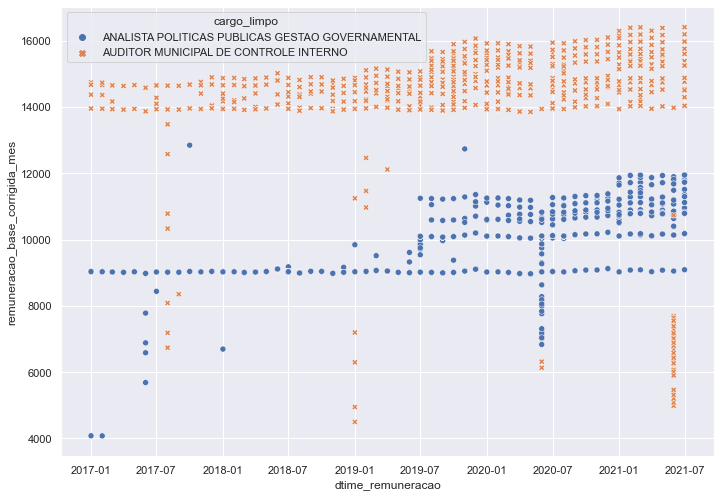

In [99]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x='dtime_remuneracao', y='remuneracao_base_corrigida_mes',
               data=hist_appgg_amci, hue = 'cargo_limpo', style="cargo_limpo")

In [104]:
medias_salarios_corrigida = hist_appgg_amci.groupby(['dtime_remuneracao', 'cargo_limpo'])[['remuneracao_base_corrigida_mes']].mean()

In [105]:
medias_salarios_corrigida = medias_salarios.reset_index()

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='remuneracao_base_corrigida_mes'>

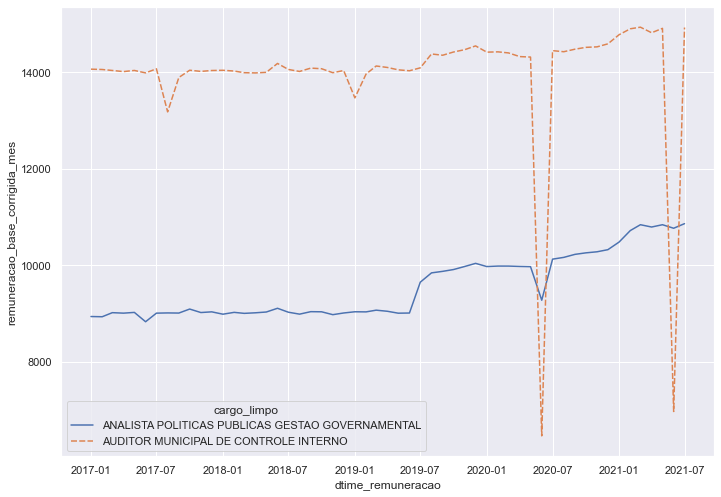

In [110]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x='dtime_remuneracao', y='remuneracao_base_corrigida_mes',
               data=medias_salarios_corrigida, hue = 'cargo_limpo', style="cargo_limpo")

In [118]:
medias_salarios_corrigida[medias_salarios_corrigida['dtime_remuneracao']=='2020-06-01T00:00:00.000000000']

,dtime_remuneracao,cargo_limpo,remuneracao_base_corrigida_mes
82,2020-06-01,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,9280.422344
83,2020-06-01,AUDITOR MUNICIPAL DE CONTROLE INTERNO,6469.439571


In [119]:
dropar = medias_salarios_corrigida[medias_salarios_corrigida['dtime_remuneracao']=='2020-06-01T00:00:00.000000000'].index

In [120]:
medias_salarios_corrigida.drop(dropar, inplace=True)

In [122]:
medias_salarios_corrigida[medias_salarios_corrigida['dtime_remuneracao']=='2021-06-01T00:00:00.000000000']

,dtime_remuneracao,cargo_limpo,remuneracao_base_corrigida_mes
106,2021-06-01,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENTAL,10771.786452
107,2021-06-01,AUDITOR MUNICIPAL DE CONTROLE INTERNO,6974.202000


In [124]:
dropar_2 = medias_salarios_corrigida[medias_salarios_corrigida['dtime_remuneracao']=='2021-06-01T00:00:00.000000000'].index

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='remuneracao_base_corrigida_mes'>

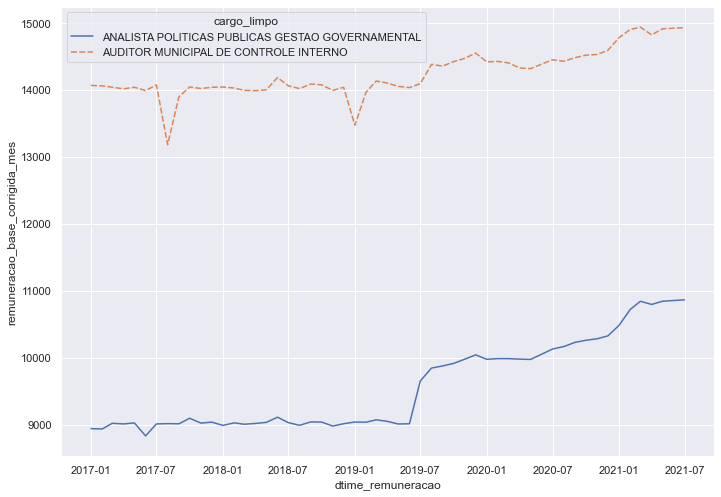

In [126]:
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x='dtime_remuneracao', y='remuneracao_base_corrigida_mes',
               data=medias_salarios_corrigida, hue = 'cargo_limpo', style="cargo_limpo")

In [129]:
hist_appgg = hist_appgg_amci[hist_appgg_amci['appgg']].copy().reset_index(drop=True)

In [172]:
remun_appgg = hist_appgg[['dtime_remuneracao', 'Remuneração do Mês', 'remuneracao_base_corrigida_mes', 'remuneracao_base_corrigida']]

In [187]:
media_appggs = remun_appgg.groupby('dtime_remuneracao').mean().reset_index()

In [188]:
media_appggs.rename({'remuneracao_base_corrigida_mes' : 'Remuneração Corrigida no Mẽs',
                    'remuneracao_base_corrigida' : 'Remuneração corrigada para 07/2021'},
                   axis =1, inplace=True)

In [189]:
media_appggs = pd.melt(media_appggs, id_vars='dtime_remuneracao')

In [190]:
media_appggs

,dtime_remuneracao,variable,value
0,2017-01-01,Remuneração do Mês,8908.602222
1,2017-02-01,Remuneração do Mês,8908.602222
2,2017-03-01,Remuneração do Mês,9000.000000
3,2017-04-01,Remuneração do Mês,9000.000000
4,2017-05-01,Remuneração do Mês,9000.000000
...,...,...,...
160,2021-03-01,Remuneração corrigada para 07/2021,11133.081905
161,2021-04-01,Remuneração corrigada para 07/2021,11049.699032
162,2021-05-01,Remuneração corrigada para 07/2021,11007.232581
163,2021-06-01,Remuneração corrigada para 07/2021,10875.190806


In [191]:
media_appggs['dtime_remuneracao'].unique()

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01

In [192]:
dropar = media_appggs[media_appggs['dtime_remuneracao']=='2020-06-01T00:00:00.000000000'].index

In [194]:
media_appggs.drop(dropar, inplace=True)

In [199]:
media_appggs.rename({'variable' : 'Remuneração',
                    'value' : 'Valor R$'}, axis =1, inplace=True)

<AxesSubplot:xlabel='dtime_remuneracao', ylabel='Valor R$'>

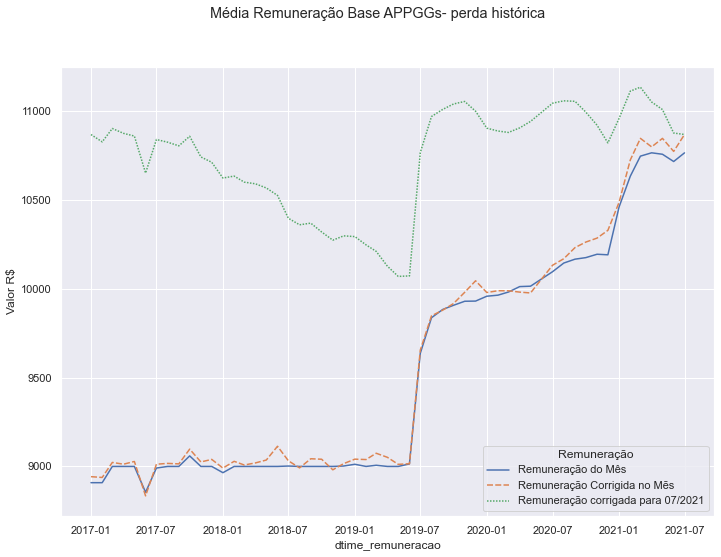

In [201]:
fig, ax = plt.subplots(figsize=a4_dims)
fig.suptitle('Média Remuneração Base APPGGs- perda histórica')
sns.lineplot(x='dtime_remuneracao', y='Valor R$',
               data=media_appggs, hue = 'Remuneração', style="Remuneração")

In [202]:
fig.savefig('grafico_perda_remuneracao.png')